In [92]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import os
from parselmouth.Sound import
from parselmouth import Formant, Sound, ToPitchMethod
import parselmouth
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

ImportError: cannot import name 'ToPitchMethod' from 'parselmouth' (/Users/andrewargaez/opt/anaconda3/lib/python3.8/site-packages/parselmouth.cpython-38-darwin.so)

In [2]:
def lst_dir(item):
    dirs = os.listdir(item)
    if '.DS_Store' in dirs:
        dirs.remove('.DS_Store')
    return dirs

In [3]:
yourpath = '/Users/andrewargaez/Vowel_play/wav_files/'

lst = []
for target in lst_dir(yourpath):
    newpath = yourpath + target
    for gender in lst_dir(newpath):
        agepath = newpath + '/'+ gender
        for age in lst_dir(agepath):
            namepath = agepath + '/'+ age
            for name in lst_dir(namepath):
                filepath = namepath + '/'+ name
                for word in lst_dir(filepath):
                    d = {}
                    finalpath = filepath + '/'+ word
                    d['Vowel']= target
                    d['gender']= gender
                    d['age']= age
                    d['word']=word[:-4]
                    d['path']= finalpath
                    lst.append(d)

In [4]:
df = pd.DataFrame(lst)

In [5]:
df

,Vowel,gender,age,word,path
0,ɒ,F,58,god,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...
1,ɒ,F,58,stock,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...
2,ɒ,F,58,loss,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...
3,ɒ,F,58,naught,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...
4,ɒ,F,58,cod,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...
...,...,...,...,...,...
2387,æ,M,24,Jan,/Users/andrewargaez/Vowel_play/wav_files/æ/M/2...
2388,æ,M,24,tan,/Users/andrewargaez/Vowel_play/wav_files/æ/M/2...
2389,æ,M,24,snack,/Users/andrewargaez/Vowel_play/wav_files/æ/M/2...
2390,æ,M,24,gas,/Users/andrewargaez/Vowel_play/wav_files/æ/M/2...


In [9]:
def gimme_dat_freq(path, f):
    lst_s = []
    formant = parselmouth.Sound(path).to_formant_burg()
    T = np.arange(formant.nt)*formant.dt + formant.t1
    form = [formant.get_value_at_time(f, t) for t in T]
    for i in range(4,len(form)-3):
        space = np.array(form[i-4:i+4]).var()
        lst_s.append(space)
    lst_s=np.array(lst_s)
    x = np.array(form)[4:-3][lst_s<1600]
    dura = len(x)*formant.dt
    formant_freq = x.mean()
    return round(formant_freq,2)

In [52]:
def gimme_dat_dur(path, f):
    lst_s = []
    formant = parselmouth.Sound(path).to_formant_burg()
    T = np.arange(formant.nt)*formant.dt + formant.t1
    form = [formant.get_value_at_time(f, t) for t in T]
    for i in range(4,len(form)-3):
        space = np.array(form[i-4:i+4]).var()
        lst_s.append(space)
    lst_s=np.array(lst_s)
    x = np.array(form)[4:-3][lst_s<1600]
    dura = len(x)*formant.dt
    formant_freq = x.mean()
    return dura

In [10]:
df['F1'] = df['path'].apply(lambda x: gimme_dat_freq(x,1))

<ipython-input-9-d0ca45b6928e>:12: RuntimeWarning: Mean of empty slice.
  formant_freq = x.mean()


In [11]:
df['F2'] = df['path'].apply(lambda x: gimme_dat_freq(x,2))

<ipython-input-9-d0ca45b6928e>:12: RuntimeWarning: Mean of empty slice.
  formant_freq = x.mean()


In [53]:
df['Duration'] = df['path'].apply(lambda x: gimme_dat_dur(x,1))

In [54]:
df.head()

,Vowel,gender,age,word,path,F1,F2,Duration
0,ɒ,F,58,god,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...,434.34,1226.21,0.51875
1,ɒ,F,58,stock,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...,771.84,1385.65,0.15625
2,ɒ,F,58,loss,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...,463.10,992.77,0.46250
3,ɒ,F,58,naught,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...,160.12,1161.59,0.38750
4,ɒ,F,58,cod,/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/5...,392.31,1120.75,0.59375


In [31]:
df.dropna(inplace=True)

In [35]:
max(df.F1.values)

1260.4

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 2391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vowel   2262 non-null   object 
 1   gender  2262 non-null   object 
 2   age     2262 non-null   object 
 3   word    2262 non-null   object 
 4   path    2262 non-null   object 
 5   F1      2262 non-null   float64
 6   F2      2262 non-null   float64
dtypes: float64(2), object(5)
memory usage: 141.4+ KB


In [55]:
gb = df.groupby('Vowel').mean()
gb

,F1,F2,Duration
Vowel,,,
i,343.056500,2231.012773,0.388523
o,442.615650,1369.950717,0.395291
u,363.195674,1677.371302,0.414012
æ,528.070132,1823.840658,0.345011
ɒ,579.928142,1221.839690,0.303816
ɔ,482.430652,1160.821522,0.381060
ɛ,483.822618,1824.323691,0.335381
ɪ,432.835482,1843.689211,0.347807
ʊ,462.317930,1452.766256,0.366850


In [49]:
Vowels = ['i','o','u','æ','ɒ','ɔ','ɛ','ɪ','ʊ','ʌ']
colors = {'i':'red','o':'blue','u':'green','æ':'yellow','ɒ':'pink','ɔ':'purple','ɛ':'brown','ɪ':'white','ʊ':'orange', 'ʌ':'teal'}

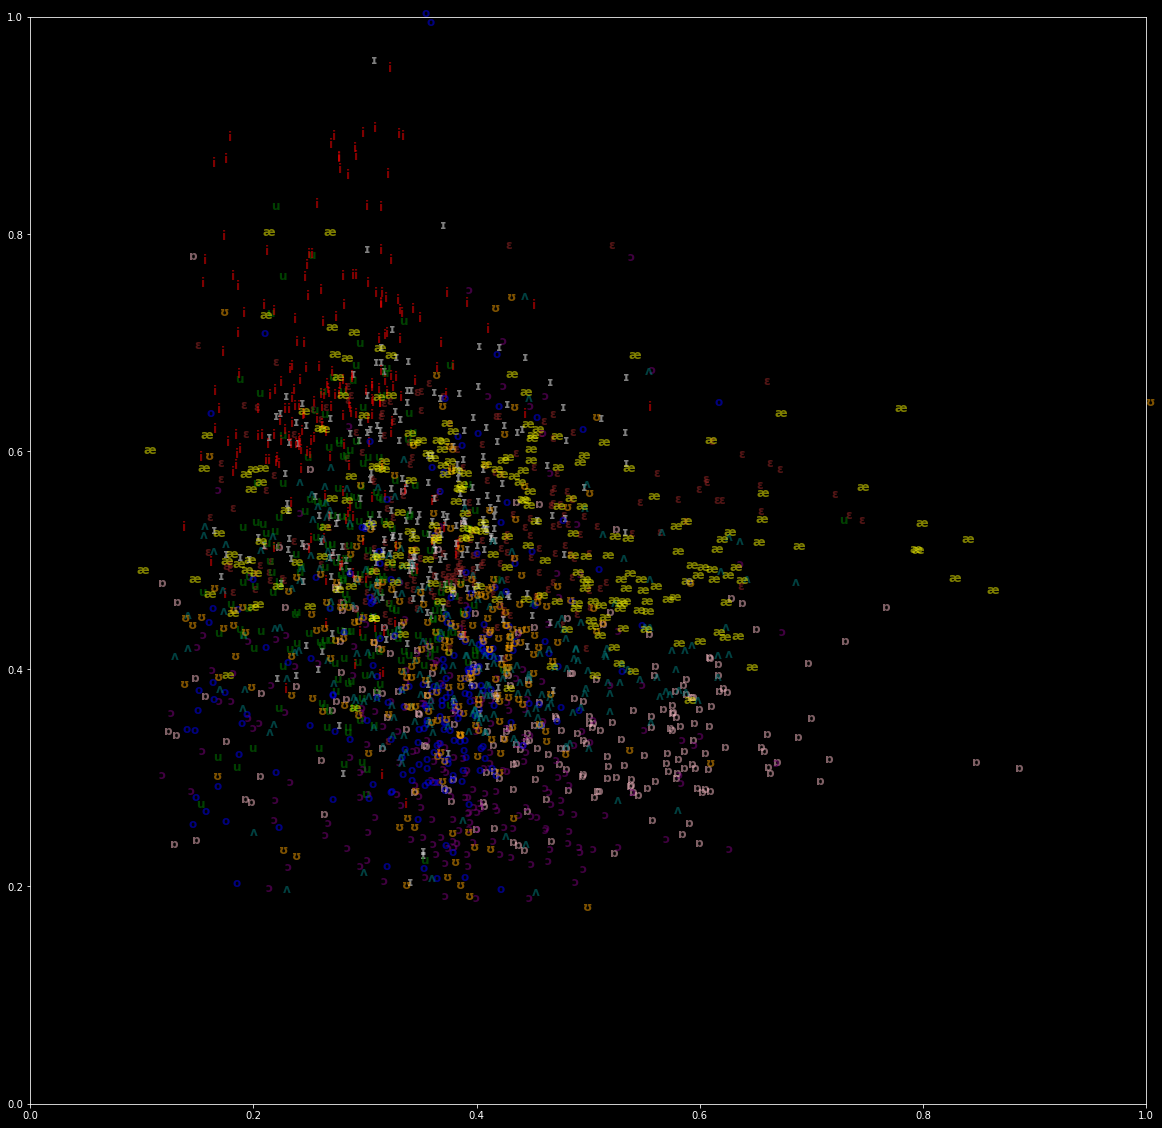

In [50]:
#x_min, x_max = np.min(df['F2'].values, 0), np.max(df['F2'].values, 0)
#df['F2'] = (df['F2'].values - x_min) / (x_max - x_min)

fig, ax = plt.subplots(figsize=(20,20))
plt.style.use('dark_background')
for i in range(len(df)):
        ax.text(df.iloc[i, 5]/1260.4, df.iloc[i, 6]/3453.69, 
                 str(df.Vowel.values[i]),
                 color=colors[str(df.Vowel.values[i])],
                 alpha=.5,
                 fontdict={'weight': 'bold', 'size': 12})

In [81]:
models = [("Random Forest", RandomForestClassifier()),
              ("Decision Tree", DecisionTreeClassifier()),
              ("kNN", KNeighborsClassifier()),
              ("Logistic", LogisticRegression()),
              ("Gradient Boosting", GradientBoostingClassifier())]

In [74]:
def get_data(item):
    data=item.drop(['Vowel','path','gender','word'], axis=1)
    labels = item.Vowel
    le = LabelEncoder()
    y = le.fit_transform(labels)
    return data, y

In [89]:
model=GradientBoostingClassifier()
data, y = get_data(df)
X_train, X_test, y_train, y_test = train_test_split(data, y)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
score = f1_score(y_test, y_hat, average='micro')
score

0.41519434628975266

In [83]:
data, y = get_data(df)
X_train, X_test, y_train, y_test = train_test_split(data, y)
print("%20s %7s %9s %9s" % ("Name", "Score", "TrainTime", "TestTime"))

for name, model in models:
    start = time.time()
    model.fit(X_train, y_train)
    trained = time.time()
    y_hat = model.predict(X_test)
    score = f1_score(y_test, y_hat, average='micro')
    tested = time.time()

print("%20s   %.3f %9s %9s" % (name, score,
                                    str(round(trained - start, 2)),
                                    str(round(tested - trained, 2))))

                Name   Score TrainTime  TestTime


/Users/andrewargaez/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Gradient Boosting   0.396      1.74      0.01


In [62]:
data, y = get_data(df)

In [ ]:
x_min, x_max = np.min(df['F2'].values, 0), np.max(df['F2'].values, 0)
df['F2'] = (df['F2'].values - x_min) / (x_max - x_min)

fig, ax = plt.subplots()
for i in range(len(df.Vowel.values)):
        plt.text(df.iloc[i, 5], df.iloc[i, 6], 
                 str(df.iloc[i,0]),
                 fontdict={'weight': 'bold', 'size': 12})
                 #color=plt.cm.tab10(y[i] / 10.),

In [ ]:
type(df.iloc[i, 5])

In [ ]:
def get_formants(soundfile_path, f):
	lst = []
	formant = parselmouth.Sound(soundfile_path).to_formant_burg()
	T = np.arange(formant.nt)*formant.dt + formant.t1
	form = [formant.get_value_at_time(f, t) for t in T]
	return form

In [ ]:
x= get_formants("/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/58/Lee/naught.wav",1)
y= get_formants("/Users/andrewargaez/Vowel_play/wav_files/ɒ/F/58/Lee/naught.wav",2)

In [ ]:
plt.plot(y)
plt.plot(x)

In [91]:
snd = parselmouth.Sound("/Users/andrewargaez/Vowel_play/wav_files/æ/M/26/Cole/ban.wav").to_formant_burg()
pch = snd.to_pitch_ac(pitch_floor=f0min,time_step=formant.dt)
f0 = pch.selected_array["frequency"] # if f0>0, you should have good formant estimates
tf = f0>0
I = [i+1 for i,v in enumerate(tf[1:]) if v and not tf[i]]

AttributeError: 'parselmouth.Formant' object has no attribute 'to_pitch_ac'